In [1]:
from datetime import datetime
from csv import DictReader
import numpy as np
import time
import operator
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

def datestr2num(ts):
    return datetime.utcfromtimestamp(int(ts)).strftime('%Y-%m-%d')
    
#init
np.set_printoptions(suppress=True)
start_time = time.time()
#folder = 'podatki/ml-latest-small/'
#podatke smo morali popraviti na viru, problematični znaki '-', '#', ',' 
terrorism = np.loadtxt('TerroristAttacks.csv', dtype='str', delimiter="|", skiprows = 2, encoding="ISO-8859-1")

Text(0.5, 1.0, 'Number Of Attacks Per Year')

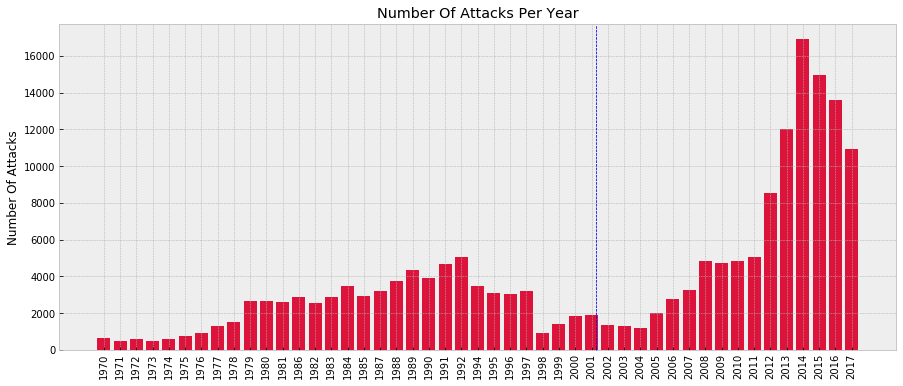

In [2]:
from collections import defaultdict

#seznam let
years = terrorism[:, 1]

number_of_attacks = defaultdict(int)

#slovar leto:št_napadov
for year in years:
    number_of_attacks[year] += 1
    
x = range(len(number_of_attacks))
plt.figure(figsize = (15, 6))
plt.bar(x, number_of_attacks.values(), color = 'crimson', align = 'center')
plt.xticks(x)
plt.gca().set_xticklabels(number_of_attacks.keys(), rotation = 90)
plt.text(30, 0, "------------------------------------------------------------------------------------------", rotation=90, verticalalignment="bottom", color="blue")
plt.ylabel('Number Of Attacks')
plt.title("Number Of Attacks Per Year")

Text(0.5, 1.0, 'Successful vs Unsuccessful Attacks For 20 Most Attacked Countries')

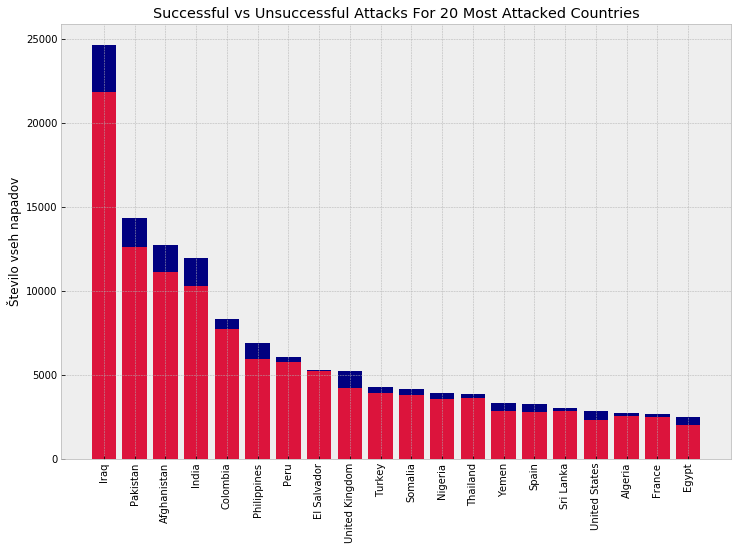

In [3]:
#seznam drzav
countries = terrorism[:, 6]

attacks_country = defaultdict(int)
for i in range(len(countries)):
    attacks_country[countries[i]] += 1
    
attacks_country = sorted(attacks_country.items(), reverse = True, key = lambda x: x[1])

success_true = []
success_false = []
success_country = []
attacks_country_success = defaultdict(list)
for i in range(20):
    success = terrorism[terrorism[:, 6] == attacks_country[i][0], 14]
    success_true.append(len(np.where(success == '1')[0]))
    success_false.append(len(np.where(success == '0')[0]))
    success_country.append(attacks_country[i][0])
    
x = range(len(success_country))

plt.figure(figsize = (12, 8))
plt.bar(x, success_true, color = 'crimson', align = 'center')
plt.bar(x, success_false, bottom = success_true, color = 'navy', align = 'center')
plt.xticks(x)
plt.gca().set_xticklabels(success_country, rotation = 90)
plt.ylabel('Število vseh napadov')
plt.title("Successful vs Unsuccessful Attacks For 20 Most Attacked Countries")

Text(0.5, 1.0, 'Number Of Attacks Per Month')

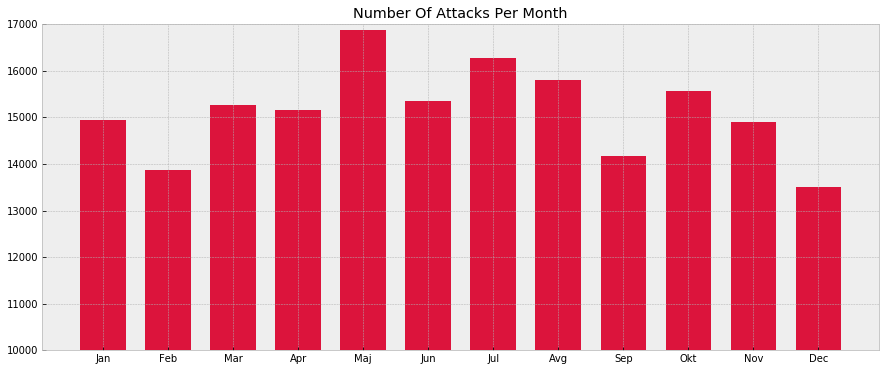

In [5]:
attacks_per_month = defaultdict(int)

for attack in terrorism:
    month = int(attack[2])
    if month > 0:
        attacks_per_month[month] += 1
    
sorted_attacks = [x[1] for x in sorted(attacks_per_month.items())]
    
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.bar(np.arange(1, 13), sorted_attacks, color = 'crimson', align="center", width=0.7)
axes.set_xticks(np.arange(1, 13))
axes.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "Maj", "Jun", "Jul", "Avg", "Sep", "Okt", "Nov", "Dec"])
axes.set_ylim((10000, 17000))
axes.set_title("Number Of Attacks Per Month")

Text(0, 0.5, 'Number of people killed')

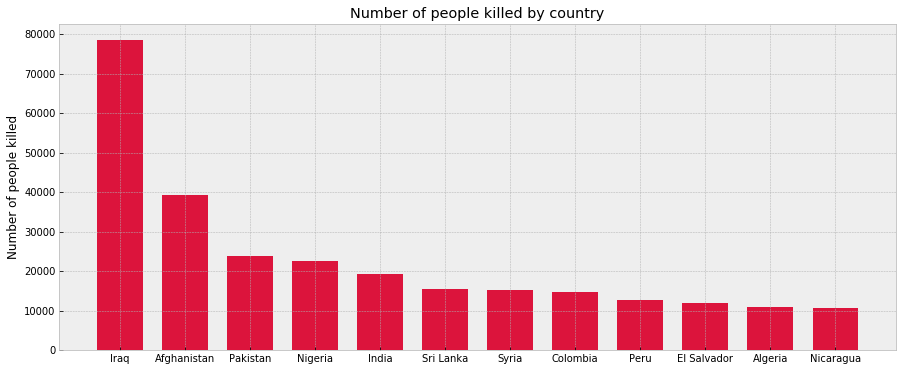

In [7]:
države = defaultdict(int)
for i in range(len(countries)):
    c = terrorism[i,22]
    if c != '':
        države[terrorism[i, 6]] += int(c)
        
country_killed = sorted([(x, države[x]) for x in države.keys() if države[x] > 1000], key=lambda tup: tup[1], reverse=True)[:12]
fig, axes = plt.subplots(1, 1, figsize=(15, 6))
axes.bar([x[0] for x in country_killed], [y[1] for y in country_killed], color = 'crimson', width=0.7)
axes.set_title("Number of people killed by country")
plt.ylabel('Number of people killed')